In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
from google.cloud import bigquery
from datetime import date
import calendar
import operator
import os
import sys


os.environ["GCLOUD_PROJECT"] = "DaysPopularity"

client = bigquery.Client()


hn_dataset_ref = client.dataset('stackoverflow', project='bigquery-public-data')
hn_dset = client.get_dataset(hn_dataset_ref)

[x.table_id for x in client.list_tables(hn_dset)]
hn_full = client.get_table(hn_dset.table('posts_questions'))

schema_subset = [col for col in hn_full.schema if col.name in ("creation_date", "title")]
results = [x for x in client.list_rows(hn_full, start_index=0, selected_fields=schema_subset, max_results=18000000)]


post_count = {
    2008: 0,
    2009: 0,
    2010: 0,
    2011: 0,
    2012: 0,
    2013: 0,
    2014: 0,
    2015: 0,
    2016: 0,
    2017: 0,
    2018: 0,
    2019: 0,
    2020: 0
}

for i in results:
  temp_dict = dict(i)
  temp_date = temp_dict['creation_date']
  temp_year = temp_date.year
  post_count[temp_year] += 1

print(post_count)


{2008: 57924, 2009: 342540, 2010: 692208, 2011: 1192677, 2012: 1633858, 2013: 2046718, 2014: 2152753, 2015: 2206658, 2016: 2137467, 2017: 1638085, 2018: 1330774, 2019: 1609341, 2020: 958997}


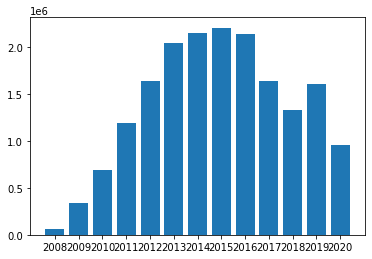

In [ ]:
import matplotlib.pyplot as plt

D = post_count

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))

plt.show()